# Домашнее задание - анализ изображений

В этом задании вы будете исследовать датасет с фотографиями лиц людей.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_pairs.html#sklearn.datasets.fetch_lfw_pairs

Вам требуется для каждой пары фотографий распознать изображен ли на них один и тот же человек или нет.
Метрика качества - ROC-AUC.

In [1]:
from sklearn.datasets import fetch_lfw_pairs
from sklearn.metrics import roc_auc_score
from sklearn.metrics.pairwise import paired_euclidean_distances, \
paired_cosine_distances, paired_manhattan_distances, manhattan_distances
from skimage.io import imshow
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

In [2]:
lfw_pairs_train = fetch_lfw_pairs(subset='train', color=True, resize=1)

In [3]:
lfw_pairs_train['pairs'].shape

(2200, 2, 125, 94, 3)

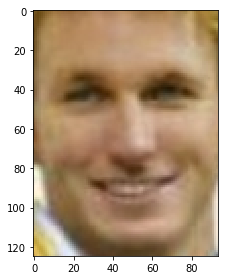

In [4]:
imshow(lfw_pairs_train['pairs'][0, 0].astype(np.uint8));

target: 1 - разные люди, 0 - один человек

In [5]:
train_target = 1 - lfw_pairs_train['target']

In [6]:
train_left = lfw_pairs_train['pairs'][:, 0]
train_right = lfw_pairs_train['pairs'][:, 1]

Многие алгоритмы не работают с данными размерностью больше двух, и поэтому развернем каждое лицо в одномерный вектор

In [7]:
train_flatten_left = train_left.reshape((lfw_pairs_train['pairs'].shape[0],-1)) 
train_flatten_right = train_right.reshape((lfw_pairs_train['pairs'].shape[0],-1))

In [8]:
train_left.shape

(2200, 125, 94, 3)

Подготовим тестовый датасет

In [9]:
lfw_pairs_test = fetch_lfw_pairs(subset='test', color=True, resize=1)

In [10]:
test_target = 1 - lfw_pairs_test['target']

In [11]:
test_left = lfw_pairs_test['pairs'][:, 0]
test_right = lfw_pairs_test['pairs'][:, 1]

In [12]:
test_flatten_left = test_left.reshape((lfw_pairs_test['pairs'].shape[0],-1)) 
test_flatten_right = test_right.reshape((lfw_pairs_test['pairs'].shape[0],-1)) 

Введем функцию сравнения двух лиц по векторам признаков

In [13]:
def compare(vec1, vec2, metric=paired_euclidean_distances):
    distances = metric(vec1, vec2)
    return MinMaxScaler().fit_transform(distances.reshape((-1, 1)))

## Baseline
Сравним вектора признаков лиц без какой-либо предобработки

In [14]:
train_distances = compare(train_flatten_left, train_flatten_right)

In [15]:
roc_auc_score(train_target, train_distances)

0.6788785123966943

In [16]:
test_distances = compare(test_flatten_left, test_flatten_right)

In [17]:
roc_auc_score(test_target, test_distances)

0.69974

## Задание
1. Извлечь "собственные лица"(eigenfaces) с помощью PCA и провести сравнение векторов признаков
2. Извлечь признаки алгоритмом [Гистограмма направленных градиентов](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%BD%D0%B0%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2) http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.hog и провести сравнение векторов признаков
3. Придумать свой способ извлечения признаков и сравнения векторов. За это задание можно заработать жетоны

$\geq$ 0.75 roc-auc - 1 жетон 

$\geq$ 0.8 roc-auc - 2 жетона

$\geq$ 0.85 roc-auc - 3 жетона

In [18]:
pca = PCA()
pca.fit(train_flatten_right)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
train_right_new = train_flatten_right/pca.singular_values_.reshape(-1,1)

In [20]:
pca1 = PCA()
pca1.fit(train_flatten_left)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
train_left_new = train_flatten_left/pca1.singular_values_.reshape(-1,1)

In [22]:
pca2 = PCA()
pca2.fit(test_flatten_left)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
test_left_new = test_flatten_left/pca2.singular_values_.reshape(-1,1)

In [24]:
pca3 = PCA()
pca3.fit(test_flatten_right)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
test_right_new = test_flatten_right/pca3.singular_values_.reshape(-1,1)

# Новый roc_auc??

In [26]:
train_distances = compare(train_left_new, train_right_new)

In [32]:
roc_auc_score(train_target, train_distances)

0.9969371900826446

In [33]:
test_distances = compare(test_left_new, test_right_new)

In [34]:
roc_auc_score(test_target, test_distances)

0.996608